In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pdb
plt.style.use(['ggplot'])

Create Data

Generate some data with:

$\theta_0= 4$

$\theta_1= 3$

$y = \theta_0 + \theta_1  x$

Add some Gaussian noise to the data. 

In [2]:
theta_0 = ...
theta_1 = ...

n_samples = 1000

np.random.seed(10) #Leave unchanged for reproducibility
X = 2 * np.random.rand(n_samples,1)
y = theta_0 + theta_1 * X+np.random.randn(n_samples,1)*2

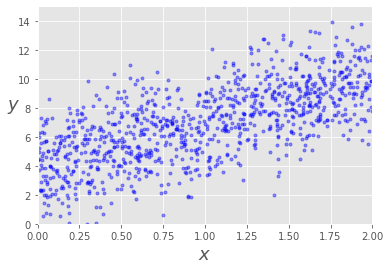

In [3]:
"""
Let's plot our data to check the relation between X and Y
"""
... #scatter plot of our data

Analytical way of Linear Regression

In matrix form:
    A = [1 , X]
    theta = [$\theta_0, \theta_1]^t$

with 1 column of 1's and X a column vector containing the sample X's

So $y = A \theta$

Use the inverse to calculate the **analytical solution**:
    $\theta = [ (A^t A)^{(-1)} A^t ] y$


In [4]:
A = np.c_[np.ones((X.size,1)),X] #Concatenate a vector of 1's as first column of A.
theta = ...
print('theta analytical: [ {:0.3f} , {:0.3f} ]^t'.format(theta[0][0],theta[1][0]))

theta analytical: [ 3.932 , 3.030 ]^t


(0.0, 2.0, 0.0, 15.0)

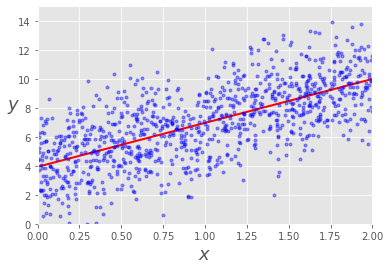

In [5]:
""" Let's plot the prediction line with the calculated theta"""

X_ln = np.array([min(X),max(X)]) #Plot a line between min x and max x
A_ln = np.c_[np.ones((2,1)),X_ln]
y_ln = A_ln.dot(theta)

plt.figure(1)
plt.plot(...,...,'r-',lw=2)
plt.plot(...,...,'b.',alpha=0.4)
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])


Compute the residual error, as given by the cost function $J(\theta)$

$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h(\theta^{(i)}) - y^{(i)})^2 $

where $y^{(i)} =   h^{(i)}\theta =   [1 , X] \theta =   A^{(i)} \theta$


In [6]:
def cal_cost(theta,X,y):
    '''
    theta = [theta_0 theta_1]^t
    A = [1 , X]
    y = A theta
    '''
    A = np.c_[np.ones((X.size,1)),X]

    m = len(y)
    y_pred = ... #predicted values using `theta` and `A`
    J = ... #Cost function
    
    return J


J = cal_cost(theta,X,y)
print('Cost / MSE (analytical):   {:0.3f}'.format(J))

Cost / MSE (analytical):   1.925


In [7]:
def gradient_descent(X,y,theta,alpha=0.01,iterations=100):
    '''
    A = [1 , X]
    y = A theta
    theta = [theta_0 theta_1]^t
    alpha = learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    A = np.c_[np.ones((X.size,1)),X]

    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,theta.shape[0]))
    update_values=np.zeros_like(theta_history)
    mean_update_values=np.zeros_like(theta_history)
    scaled_update_values=np.zeros_like(theta_history)

    #Gradient Iterations
    for it in range(iterations):
        #Bookkeeping
        _cost = ...          #Calculate `cost` i.e., loss function value at current theta.
        cost_history[it] = ...             #Store `cost`
        theta_history[it,:] = ...  #Store current value of `theta`
        
        #Start Gradient Descent Updates
        ...
        
    return theta, cost_history, theta_history,update_values,mean_update_values,scaled_update_values

In [8]:
"""
Let's start with 500 iterations and a learning rate of 0.01
Start with a random theta (extracted from a Gaussian distribution mean 0 std 1)
"""

alpha =0.01
n_iter = 5000

np.random.seed(20)
theta_start = np.random.randn(2,1)+np.array([[-2],[4]])

#theta,cost_history,theta_history = gradient_descent(X,y,theta_start,alpha,n_iter)
theta_grad,cost_history,theta_history,update_values,\
mean_update_values,scaled_update_values =gradient_descent(X,y,theta_start,alpha,n_iter)

print('Theta (GD): [ {:0.3f} , {:0.3f} ]^t'.format(theta[0][0],theta[1][0]))
print('Cost / MSE (GD):   {:0.3f}'.format(cost_history[-1]))

Theta (GD): [ 3.932 , 3.030 ]^t
Cost / MSE (GD):   1.925


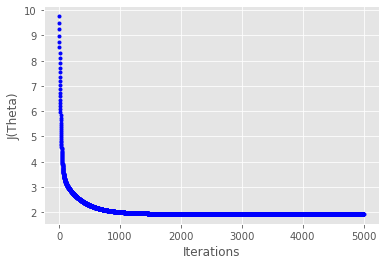

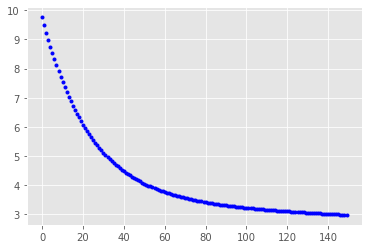

In [9]:

""" Let's plot the cost history over iterations"""

fig,ax = plt.subplots(num=2)

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_= ax.plot(...,...,'b.') #plot the loss history.

""" Let us zoom in till iteration 150 """
fig,ax = plt.subplots(num=3)
_=ax.plot(...,...,'b.') #plot the first 150 iterations of loss

# Create Plots of evolution of `theta` with training.

/var/folders/w7/ntqh397j7r1g34xm7y1cnzn40000gn/T/ipykernel_76218/679892051.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax=plt.subplots(1,1,figsize=(7,6))


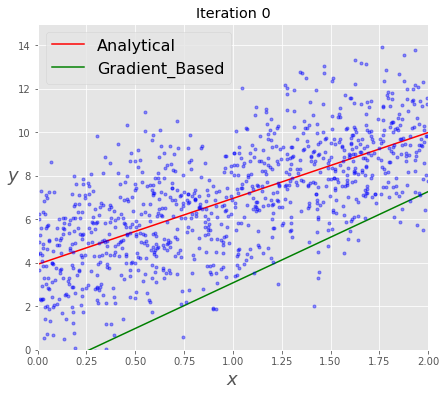

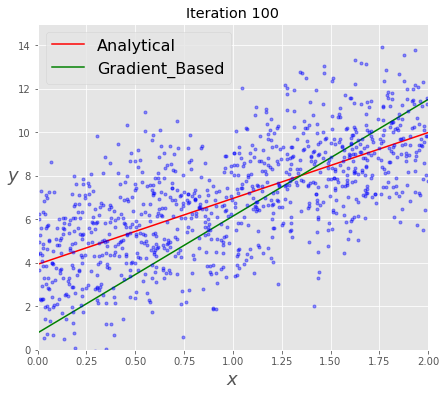

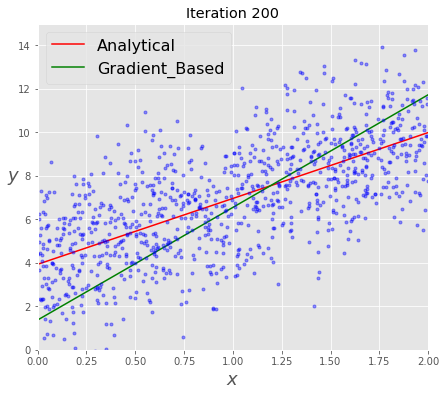

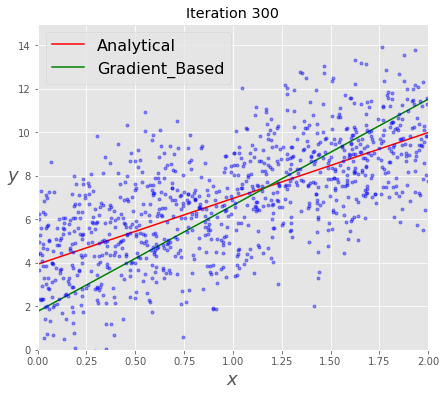

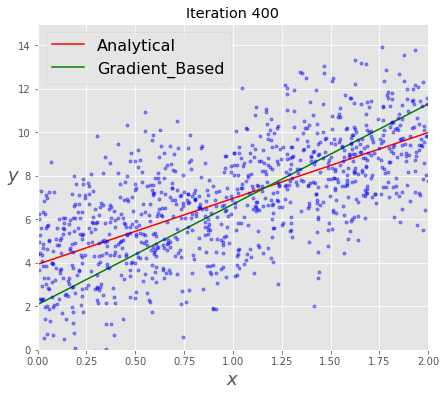

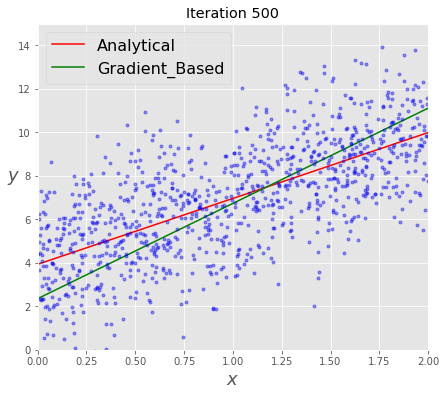

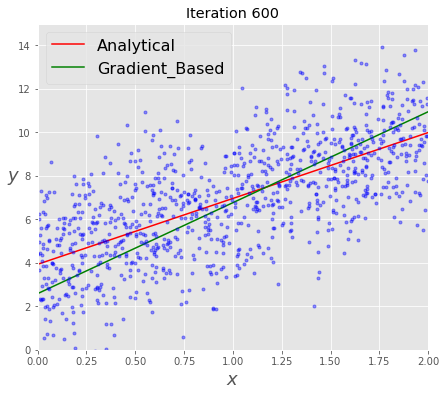

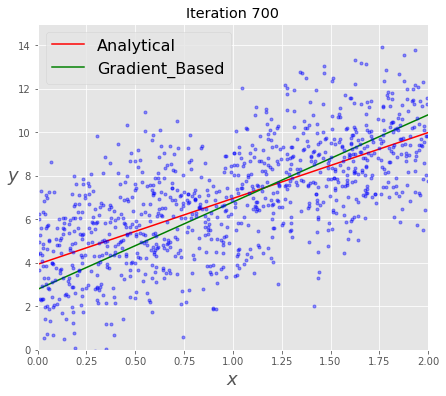

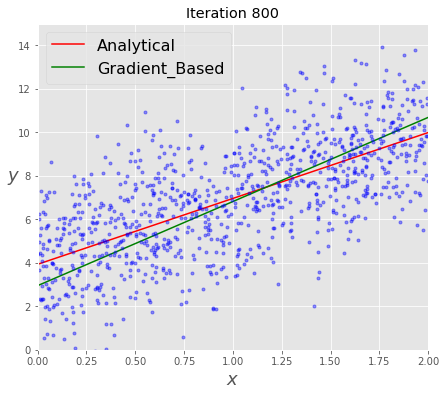

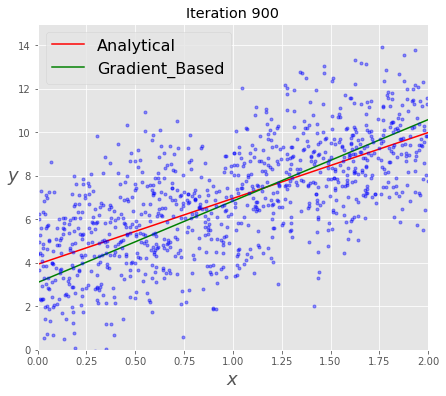

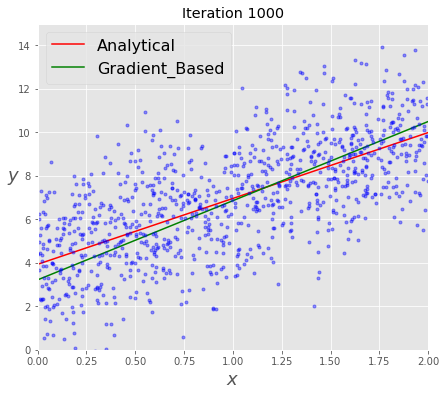

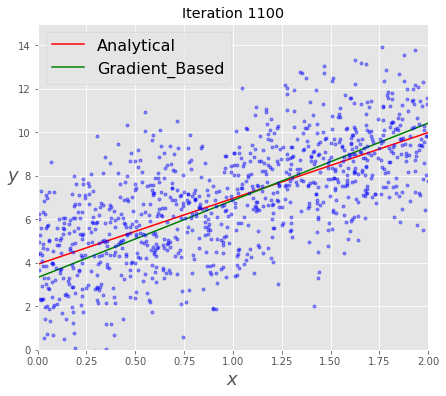

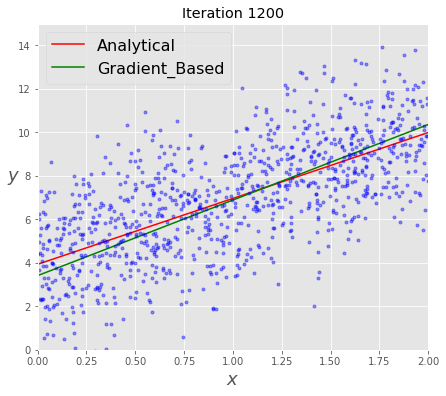

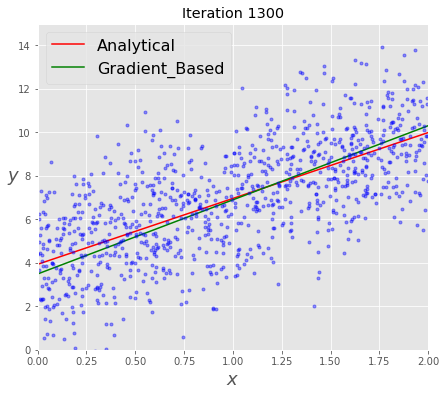

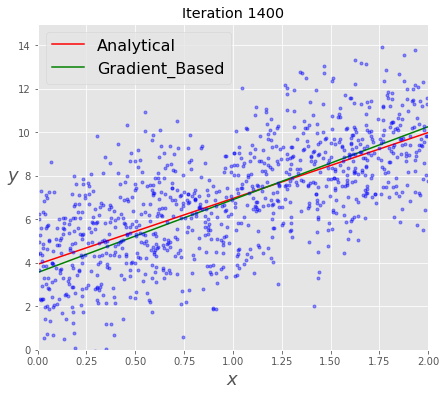

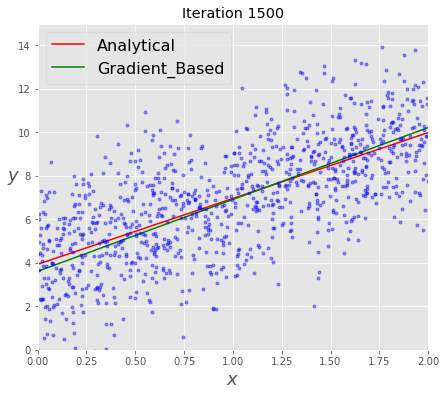

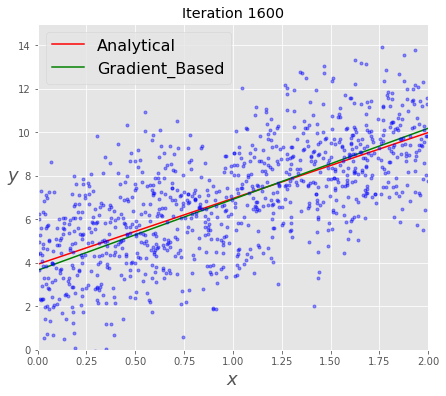

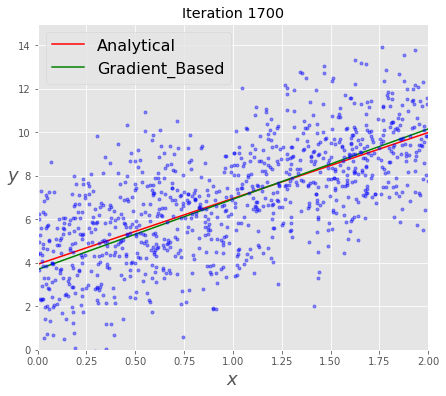

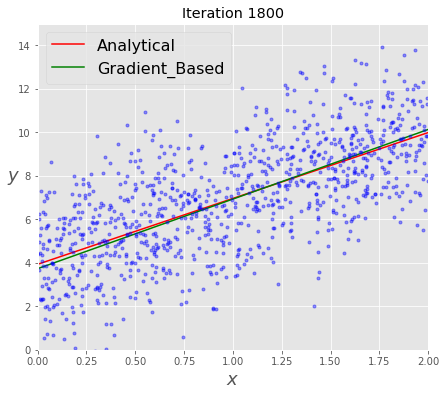

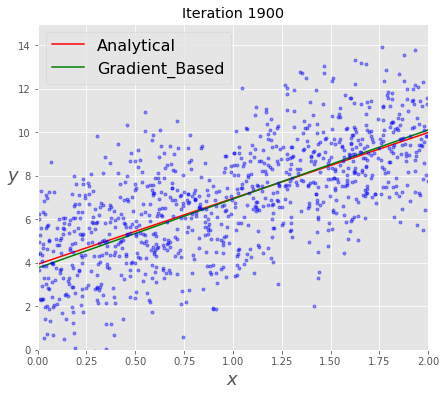

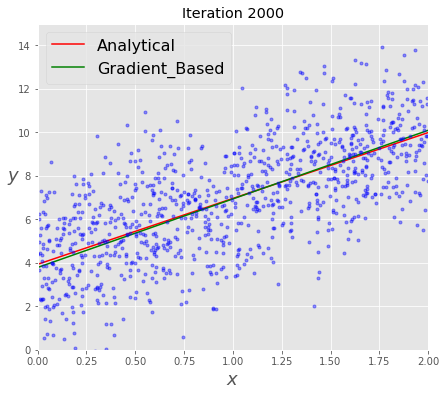

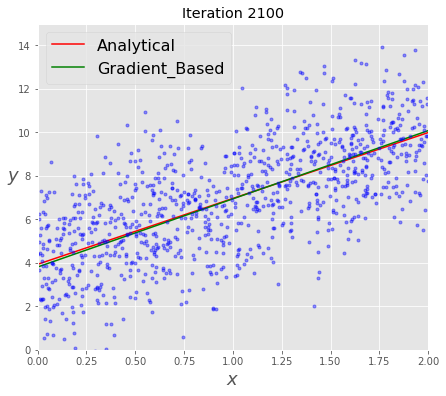

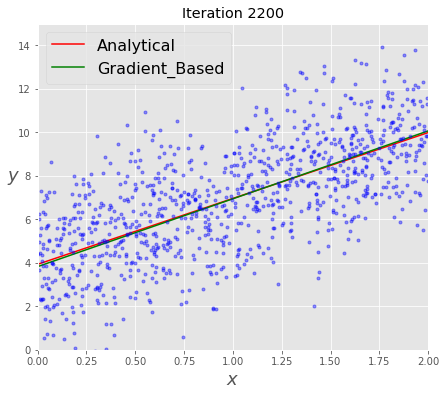

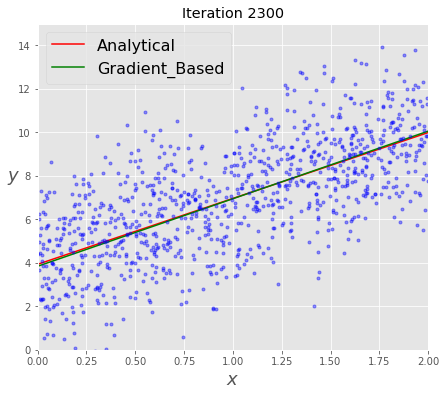

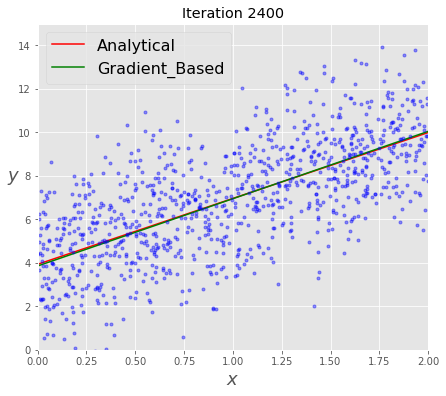

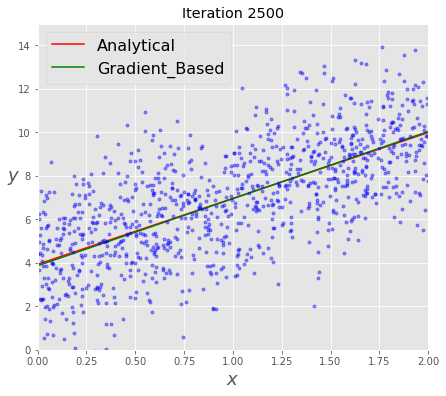

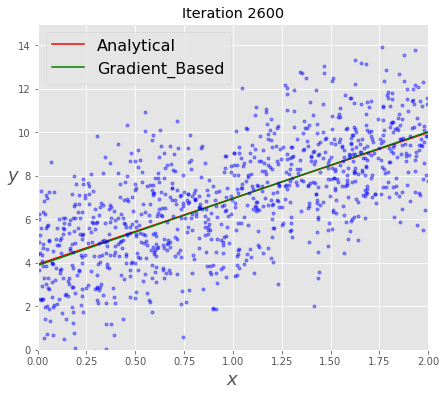

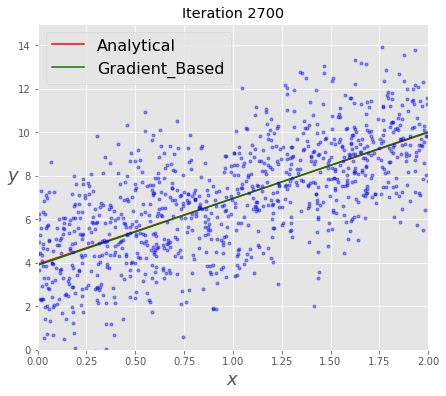

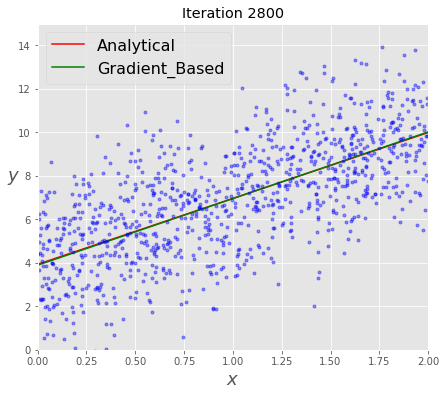

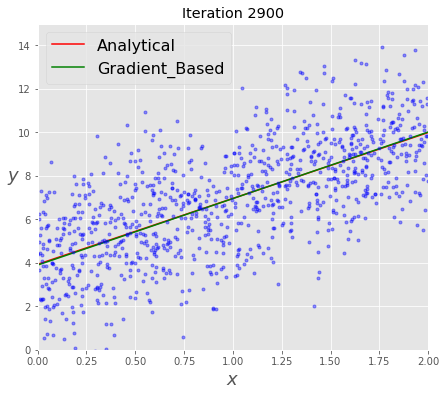

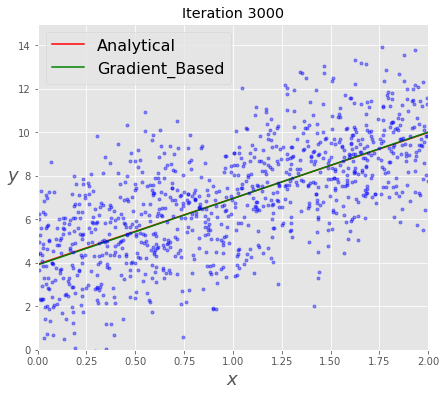

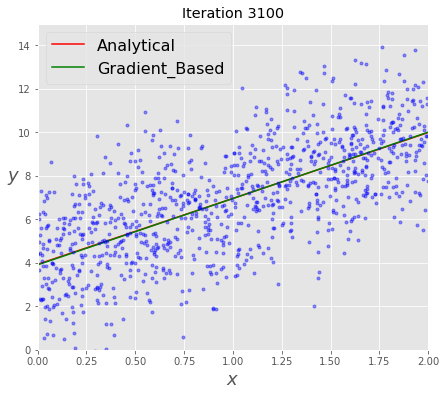

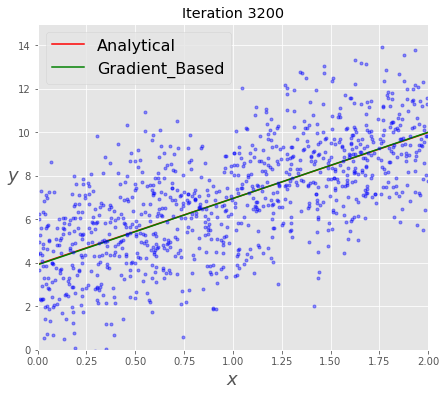

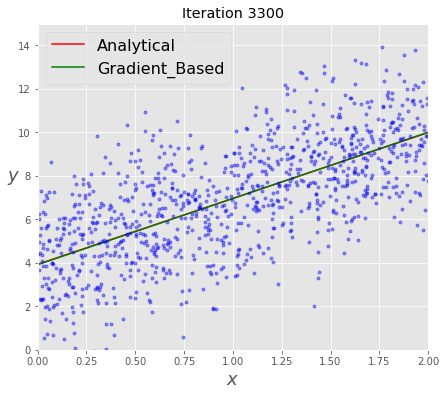

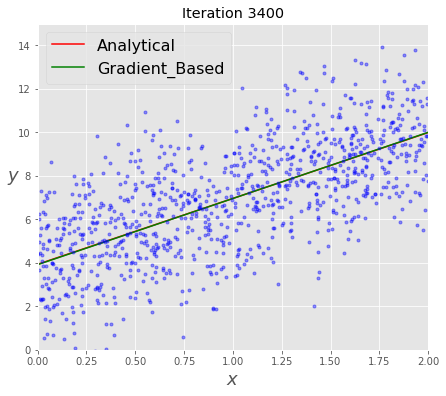

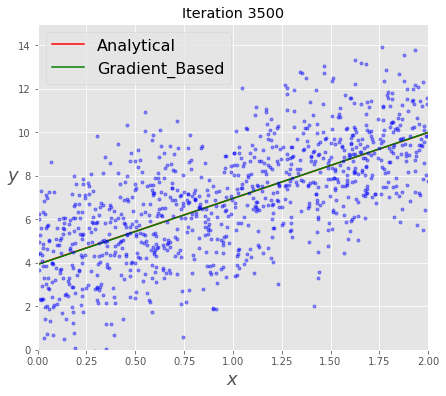

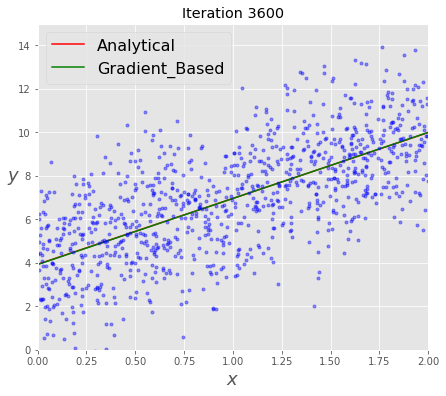

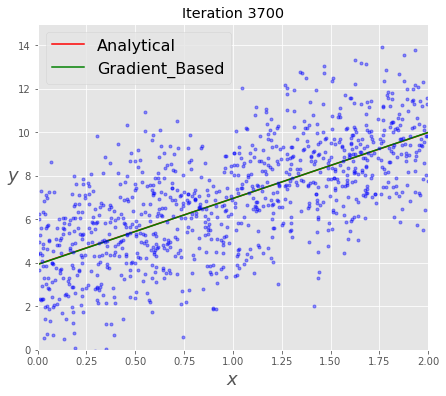

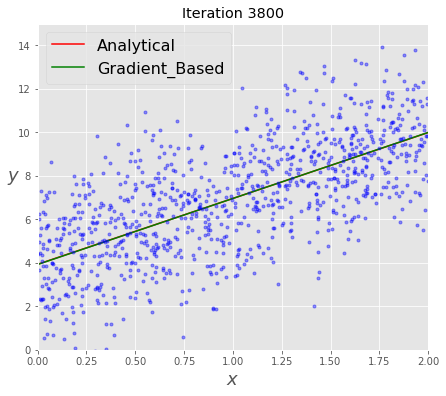

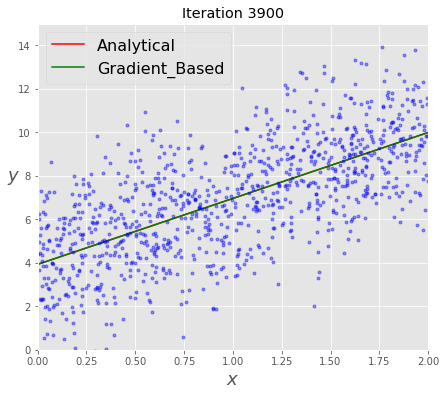

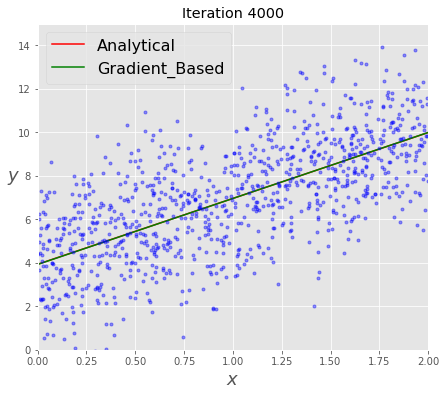

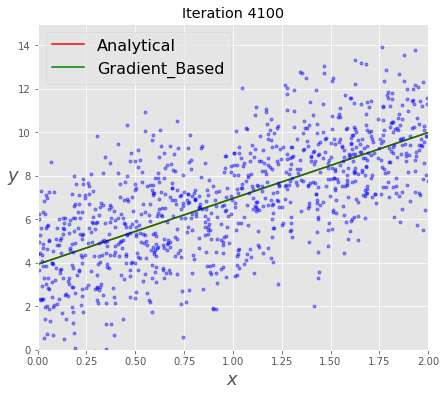

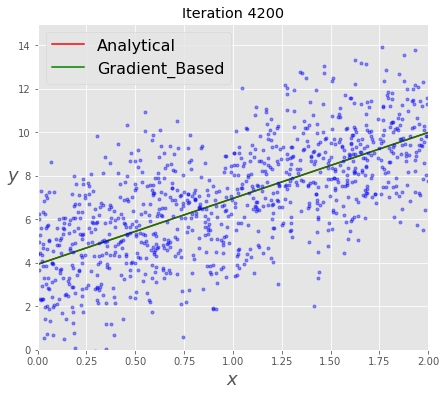

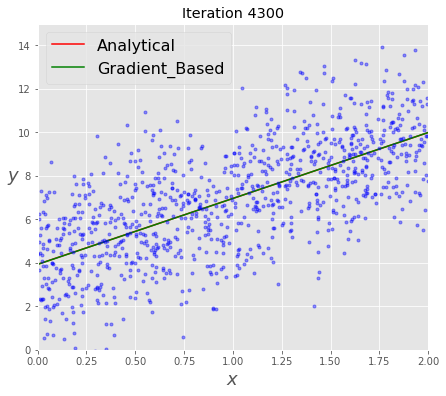

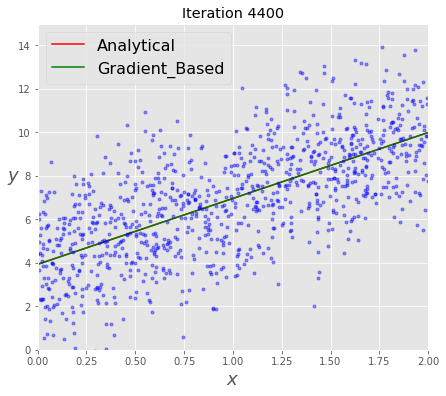

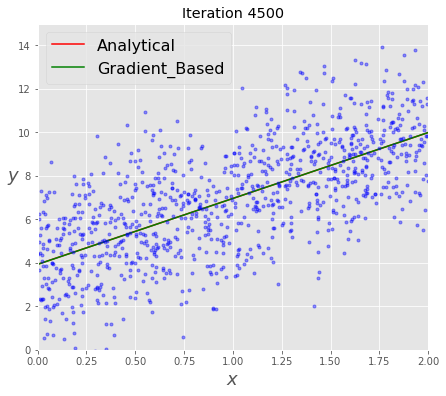

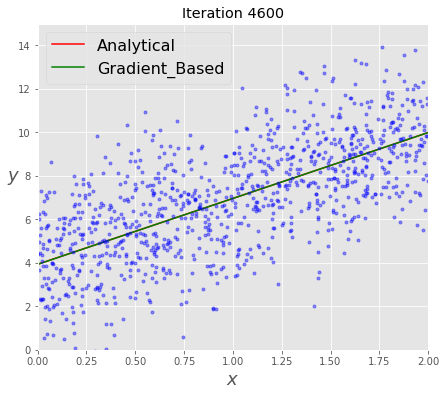

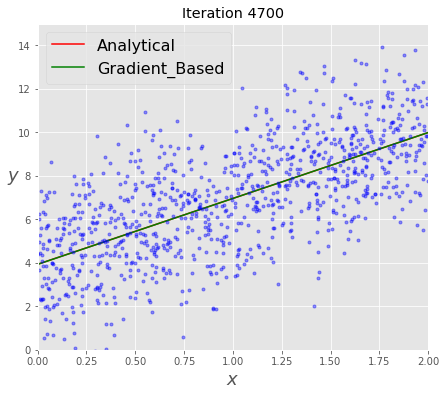

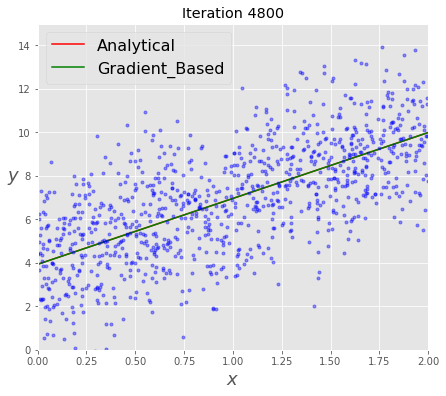

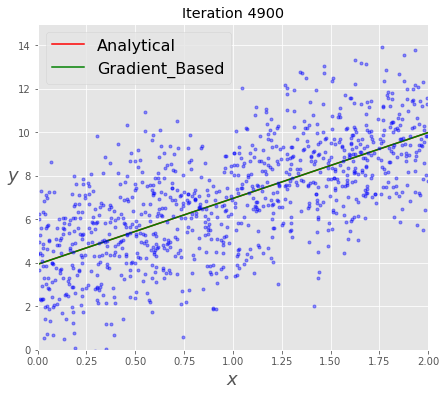

In [10]:
for i in np.arange(0,n_iter,100):
    fig,ax=plt.subplots(1,1,figsize=(7,6))
    
    X_ln = np.array([min(X),max(X)])          #Plot a line between min x and max x
    A_ln = np.c_[np.ones((2,1)),X_ln]
    y_ln = ...                    #Predictions obtained from `analytical model`
    _theta_grad = ...             #get theta for `i^{th}` iteration of gradient descent
    y_grad_ln= ...                #Predictions obtained from theta for `i^{th}` iteration of gradient descent
    
    ax.plot(X_ln,y_ln,'r-',lw=1.5)
    ax.plot(X_ln,y_grad_ln,'g-',lw=1.5)
    ax.plot(X,y,'b.',alpha=0.4)
    ax.set_xlabel("$x$", fontsize=18)
    ax.set_ylabel("$y$", rotation=0, fontsize=18)
    ax.set_xlim([0,2])
    ax.set_ylim([0,15])
    ax.set_title("Iteration {}".format(i))
    ax.legend(['Analytical','Gradient_Based'],fontsize=16)
#     fig.savefig("gradient_descent_fig_{}.png".format(int(i)),dpi=300) #uncomment to save a range of figures.